In [ ]:
###############################################################


#################
# LINEAR MODELS #
#################


# Installs (only needed on first run)
'''
!pip install ripser
!pip install persim
!pip install networkx
!pip install scikit-learn
!pip install matplotlib
!pip install tables
'''


# Package imports (needed every run)
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
from scipy.spatial.distance import pdist, squareform
import networkx as nx
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting
import os # Required to use file paths
import shutil # Required to move temporary files around
import random # Used to create training/testing split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import KFold


# As needed
from google.colab import drive
drive.mount('/content/drive')


# Tell python which folder to look in. Change depending on the bin dimension
dim_bins = 10
folder_path = f"/content/drive/MyDrive/Glider data/dim_bins{dim_bins}/"
relative_path = f"/dim_bins{dim_bins}/"

# Function to the h5 file at the chosen path
def read_h5(file_path):
    if file_name.endswith(".h5"):
      df = pd.read_hdf(file_path)
      print("File successfully read.\n")
      return df
    else:
      print("File is not an h5. Skipping...\n")

folder_path = f"/content/drive/MyDrive/Glider data/dim_bins{dim_bins}/"
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

dfs = [pd.read_hdf(os.path.join(folder_path, f), key="data") for f in file_names]


# Create folds for training/testing split
n_datasets = len(file_names)
k = 10  # Number of folds

kf = KFold(n_splits=k, shuffle=True, random_state=42)
dataset_indices = np.arange(n_datasets)

folds = []

for train_indices, test_indices in kf.split(dataset_indices):
    train_df = pd.concat([dfs[i] for i in train_indices], ignore_index=True)
    test_df = pd.concat([dfs[i] for i in test_indices], ignore_index=True)
    folds.append((train_df, test_df))

print(f"Created {len(folds)} dataset-level k-fold splits.")
print(folds)




def split_data(file_names, training_param = math.floor(len(file_names) / 2)):
  # Training/Testing split
  rand_files = random.sample(file_names, len(file_names))
  training_size = training_param
  training_files = rand_files[ :training_size]
  testing_files = rand_files[training_size: ]

  dfs_training = [pd.read_hdf(os.path.join(folder_path, f), key="data") for f in training_files]
  training_data = pd.concat(dfs_training, ignore_index=True)

  dfs_testing = [pd.read_hdf(os.path.join(folder_path, f), key="data") for f in testing_files]
  testing_data = pd.concat(dfs_testing, ignore_index=True)

  #print(training_data)


  # Clean data
  target_column = "oxygen"
  excess_column = "voxel"
  X_train = training_data.drop(columns=[target_column, excess_column])  # Features
  y_train = training_data[target_column]  # Target

  X_test = testing_data.drop(columns=[target_column, excess_column])
  y_test = testing_data[target_column]

  return [X_train, y_train, X_test, y_test]



all_data = split_data(file_names, 17)

X_train = all_data[0]
y_train = all_data[1]
X_test = all_data[2]
y_test = all_data[3]

#print(X_train)
#print(X_test)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Created 10 dataset-level k-fold splits.
[(          voxel      oxygen  longitude   latitude      depth   salinity  \
0     (0, 3, 3)  274.128204 -64.142525  47.459793  47.162205  31.158737   
1     (0, 3, 4)  278.716797 -64.154785  47.469486  51.389397  31.235714   
2     (0, 3, 5)  280.982758 -64.173584  47.473866  55.690685  31.502001   
3     (0, 4, 4)  283.356384 -64.184593  47.497772  53.706070  31.240005   
4     (0, 4, 5)  276.457581 -64.185623  47.501610  56.119427  31.372114   
...         ...         ...        ...        ...        ...        ...   
7611  (8, 2, 0)  249.490448 -61.898506  48.482128   0.858110  30.016531   
7612  (8, 2, 1)  252.785767 -61.924633  48.484848   4.794561  29.732487   
7613  (8, 2, 2)  256.908752 -61.936039  48.478157   7.685635  29.385492   
7614  (9, 0, 0)  262.581268 -61.596466  48.324509   1.025769  29.428911   
7615

In [ ]:
# Assume datasets is a list of preloaded DataFrames
n_datasets = len(datasets)
k = 10  # Number of folds

kf = KFold(n_splits=k, shuffle=True, random_state=42)
dataset_indices = np.arange(n_datasets)

folds = []

for train_indices, test_indices in kf.split(dataset_indices):
    train_df = pd.concat([datasets[i] for i in train_indices], ignore_index=True)
    test_df = pd.concat([datasets[i] for i in test_indices], ignore_index=True)
    folds.append((train_df, test_df))

print(f"Created {len(folds)} dataset-level k-fold splits.")
print(folds)

['component_0_binned_349.h5', 'component_1_binned_227.h5', 'component_2_binned_300.h5', 'component_4_binned_257.h5', 'component_3_binned_210.h5', 'component_5_binned_229.h5', 'component_6_binned_180.h5', 'component_8_binned_254.h5', 'component_7_binned_344.h5', 'component_9_binned_325.h5', 'component_10_binned_236.h5', 'component_11_binned_277.h5', 'component_12_binned_340.h5', 'component_14_binned_165.h5', 'component_13_binned_444.h5', 'component_18_binned_209.h5', 'component_17_binned_192.h5', 'component_15_binned_257.h5', 'component_16_binned_217.h5', 'component_19_binned_422.h5', 'component_20_binned_482.h5', 'component_21_binned_202.h5', 'component_22_binned_390.h5', 'component_24_binned_245.h5', 'component_23_binned_198.h5', 'component_25_binned_204.h5', 'component_26_binned_323.h5', 'component_28_binned_194.h5', 'component_27_binned_233.h5', 'component_29_binned_192.h5', 'component_30_binned_204.h5', 'component_31_binned_171.h5']
          voxel      oxygen  longitude   latitude

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.036e+05, tolerance: 1.026e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.036e+05, tolerance: 1.026e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

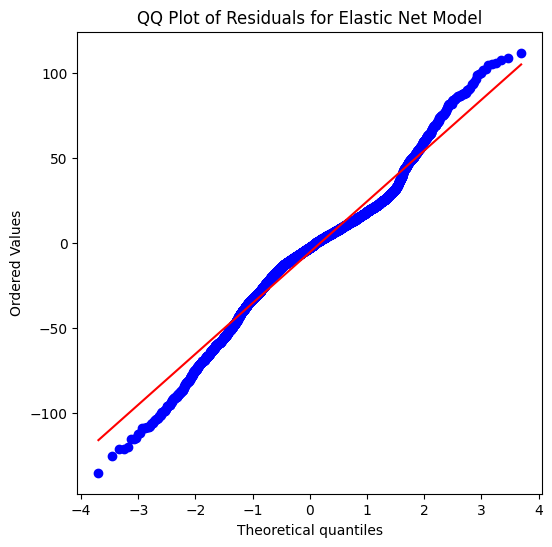

In [ ]:
#################
# Linear Models #
#################



#######################################
# Model 1) Linear regression          #
#######################################

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f} \n \n")

#############################
# Model 2) Ridge regression #
#############################

# 2a) Ridge Regression (fixed penalty)

ridge_penalty = 0.5

# Python uses alpha instead of lambda for the ridge penalty
ridge_model = Ridge(alpha = ridge_penalty)
ridge_model.fit(X_train, y_train)

# Predictions on test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print results
print(f"Ridge Regression Results:")
print(f"Mean Squared Error: {mse_ridge:.4f}")
print(f"R² Score: {r2_ridge:.4f}")

# 2b) Ridge Regression with Cross Validation for optimal penalty term

# Define the Ridge regression model
ridge = Ridge()

# Define the grid of alpha values
alpha_grid = {'alpha': np.logspace(-3, 3, 1000)}
print(alpha_grid)


# Perform Grid Search with Cross-Validation
ridge_cv = GridSearchCV(ridge, alpha_grid, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

# Get the best alpha value
best_alpha = ridge_cv.best_params_['alpha']
print(f"Optimal ridge penalty: {best_alpha}")

# Train Ridge Regression with the best alpha
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train, y_train)

# Predictions on test set
y_pred_ridge = best_ridge.predict(X_test)

# Evaluate the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print results
print(f"Ridge Regression with Best Alpha ({best_alpha}):")
print(f"Mean Squared Error: {mse_ridge:.4f}")
print(f"R² Score: {r2_ridge:.4f}")



########################
# 3) Elastic net model #
########################


# Expand feature space with interaction terms (without high-degree polynomials)
poly = PolynomialFeatures(degree=5, interaction_only=True, include_bias=False)
X_train_expanded = poly.fit_transform(X_train)
X_test_expanded = poly.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_expanded)
X_test_scaled = scaler.transform(X_test_expanded)

# Define Elastic Net model
elastic_net = ElasticNet(max_iter=500)  # High max_iter for convergence

# Define Grid Search for alpha (regularization strength) and l1_ratio (balance between Lasso & Ridge)
param_grid = {
    'alpha': np.logspace(-3, 3, 10),  # Regularization strength
    'l1_ratio': np.linspace(0, 1, 10)  # 0 = Ridge, 1 = Lasso, values in between = Elastic Net
}

# Perform Grid Search with Cross-Validation (5-fold CV)
elastic_cv = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
elastic_cv.fit(X_train_scaled, y_train)

# Get the best alpha and l1_ratio
best_alpha = elastic_cv.best_params_['alpha']
best_l1_ratio = elastic_cv.best_params_['l1_ratio']
print(f"Best Elastic penalty: {best_alpha}, Best L1 Ratio: {best_l1_ratio}")

# Train final Elastic Net model with best parameters
best_elastic = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=500)
best_elastic.fit(X_train_scaled, y_train)

# Predictions on test set
y_pred_elastic = best_elastic.predict(X_test_scaled)

# Evaluate the Elastic Net model
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

# Print results
print(f"Elastic Net with Interaction Terms:")
print(f"Mean Squared Error: {mse_elastic:.4f}")
print(f"R² Score: {r2_elastic:.4f}")

# Residuals: difference between true values and predicted values
residuals = y_test - y_pred_elastic

# QQ Plot
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals for Elastic Net Model')
plt.show()

plt.hist(residuals, 100)

(array([  1.,   0.,   0.,   0.,   3.,   3.,   4.,   7.,   7.,   6.,  10.,
         11.,  11.,  13.,  16.,  25.,  26.,  32.,  41.,  53.,  48.,  56.,
         53.,  76.,  83.,  97., 148., 127., 170., 190., 235., 246., 247.,
        248., 264., 284., 253., 250., 235., 180., 190., 135., 124., 129.,
        109., 103., 100.,  97.,  94.,  96.,  67.,  68.,  64.,  39.,  58.,
         40.,  41.,  46.,  43.,  21.,  38.,  35.,  38.,  38.,  30.,  30.,
         36.,  26.,  28.,  26.,  25.,  30.,  29.,  25.,  20.,  21.,  22.,
         19.,  18.,  20.,  26.,  15.,  22.,  19.,  19.,  11.,  14.,  15.,
         16.,  14.,  13.,  15.,  15.,  10.,  10.,   8.,   6.,   3.,   0.,
          2.]),
 array([-6.63200226e+01, -6.45293121e+01, -6.27386017e+01, -6.09478912e+01,
        -5.91571846e+01, -5.73664742e+01, -5.55757637e+01, -5.37850533e+01,
        -5.19943466e+01, -5.02036362e+01, -4.84129257e+01, -4.66222153e+01,
        -4.48315048e+01, -4.30407944e+01, -4.12500839e+01, -3.94593773e+01,
        -3.766

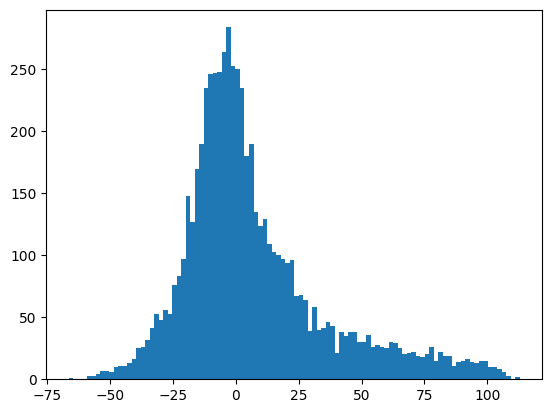